In [ ]:
### Author: Mile Selesko
### Date: 13-Feb-2024
### Purpose: Looks at the relationship between SDOH measures and the preventative health measures.

# Import Libraries

In [19]:
#Defining libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
# load watermark
%load_ext watermark

In [3]:
#Importing helper functions
%run "helper_functions.ipynb"

# Import Dataset

In [4]:
#Input path for all CSV, Excel, etc. downloaded files. To be used to load these files
#Alternatively, can also read the json files using census API where relevant
input_path=r"C:\Users\msele\OneDrive\Documents\MADS Program\Milestone 1\inputs"

In [5]:
# import dataset
df_combined_zip = pd.read_pickle(input_path+r"\combined_dataset_nona.pkl")

In [6]:
# check shape of data
df_combined_zip.shape

(25321, 79)

In [7]:
df_combined_zip.sample(5)

,ZIP,Estimate Households Total,Percent Households lt 10k,Estimate Households Median income (dollars),Estimate Families Total,Estimate Families Median income (dollars),Estimate Nonfamily households Total,Estimate Nonfamily households Median income (dollars),Percent Households that are Families,TotalPopulation_x,All Teeth Lost,Annual Checkup,Any Disability,Arthritis,Binge Drinking,COPD,Cancer (except skin),Cervical Cancer Screening,Cholesterol Screening,Chronic Kidney Disease,Cognitive Disability,Colorectal Cancer Screening,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Depression,Diabetes,General Health,Health Insurance,Hearing Disability,High Blood Pressure,High Cholesterol,Independent Living Disability,Mammography,Mental Health,Mobility Disability,Obesity,Physical Health,Physical Inactivity,Self-care Disability,Sleep <7 hours,Stroke,Taking BP Medication,Vision Disability,TotalPopulation_y,Crowding among housing units,Housing cost burden among households,No broadband internet subscription among households,No high school diploma among adults aged 25 years or older,Persons aged 65 years or older,Persons living below 150% of the poverty level,Persons of racial or ethnic minority status,Single-parent households,Unemployment among people 16 years and older in the labor force,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Percent!!RACE!!Total population,Percent!!RACE!!Total population!!One race,Percent!!RACE!!Total population!!One race!!Black or African American,Percent Margin of Error!!RACE!!Total population!!One race!!Black or African American,Percent!!RACE!!Total population!!One race!!American Indian and Alaska Native,Percent Margin of Error!!RACE!!Total population!!One race!!American Indian and Alaska Native,Percent!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander,Percent Margin of Error!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race),Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race),Estimate!!Total housing units,State Name,State,Political Affiliation (2008-2020 presidential elections),spend_2017,spend_2018,spend_2019,spend_2020,longitude,latitude
5093,16428,4937.0,4.1,68591.0,2915.0,83592.0,2022.0,46883.0,0.590440,12478.0,14.7,77.8,28.2,29.9,18.3,7.0,7.3,83.9,84.9,2.9,12.9,74.9,46.5,43.8,6.1,10.7,18.2,70.8,21.5,9.4,15.3,6.6,7.0,29.7,35.1,7.2,77.4,15.9,12.8,35.9,11.9,23.5,3.3,32.3,3.0,78.0,4.1,12614.0,1.8,18.1,20.7,8.3,18.5,16.4,9.4,5.1,6.0,12313.0,103.2,12313.0,95.3,1.8,1.1,0.3,0.4,0.0,0.2,4.4,2.1,5316.0,Pennsylvania,PA,Light Blue,12.63415,14.50,15.06,14.99,-79.828491,42.170567
8160,25901,4330.0,6.4,47582.0,2735.0,69099.0,1595.0,27995.0,0.631640,11920.0,26.2,77.7,44.1,40.4,11.9,13.5,7.6,81.6,85.9,3.9,21.2,65.4,46.4,37.2,9.9,12.6,25.9,47.1,30.9,15.8,26.9,10.8,10.1,44.6,41.9,13.7,78.2,21.6,23.9,43.4,17.8,36.5,6.2,43.2,4.4,81.2,7.6,10728.0,1.9,26.9,21.1,13.7,19.9,32.4,10.6,4.8,10.6,11498.0,89.5,11498.0,98.4,4.9,1.6,0.0,0.3,0.2,0.3,2.1,1.5,5806.0,West Virginia,WV,Deep Red,57.28298,59.61,58.74,62.83,-81.111790,37.947685
2412,08302,14417.0,5.1,58185.0,9953.0,67034.0,4464.0,31940.0,0.690366,46872.0,19.4,73.4,35.9,25.9,16.6,8.0,5.8,79.0,81.8,3.3,18.2,64.6,39.5,28.7,6.4,11.1,22.5,51.2,21.1,12.9,24.7,22.7,6.3,34.4,34.1,11.2,75.9,18.7,16.7,40.8,14.8,38.0,6.0,40.8,3.7,75.0,8.8,47358.0,4.0,40.2,17.8,22.3,11.7,34.4,66.0,10.8,6.6,44640.0,108.5,44640.0,92.9,28.5,2.1,1.7,0.5,0.0,0.1,32.8,2.2,15169.0,New Jersey,NJ,Deep Blue,26.02118,28.29,29.21,31.25,-75.260757,39.439667
27101,76712,10732.0,2.0,91862.0,7796.0,108982.0,2936.0,48571.0,0.726426,23506.0,9.9,75.0,28.1,26.1,16.9,6.3,8.0,81.2,87.3,3.1,10.8,71.8,52.1,44.6,5.9,9.1,11.9,63.8,22.1,9.8,14.3,11.9,7.0,33.1,38.3,6.5,75.1,14.4,12.

# Analysis

In [8]:
# sdoh columns
sdoh_measures = ['Crowding among housing units','Housing cost burden among households','No broadband internet subscription among households',
                 'No high school diploma among adults aged 25 years or older','Persons aged 65 years or older',
                 'Persons living below 150% of the poverty level','Persons of racial or ethnic minority status',
                 'Single-parent households','Unemployment among people 16 years and older in the labor force']

# preventative health services columns
prevention_measures = ['Health Insurance','Taking BP Medication','Cervical Cancer Screening','Annual Checkup','Cholesterol Screening',
                       'Colorectal Cancer Screening','Core preventive services for older men','Core preventive services for older women',
                       'Dental Visit','Mammography']

# columns that will be correlated
cols_to_corr = ['Crowding among housing units','Housing cost burden among households','No broadband internet subscription among households',
        'No high school diploma among adults aged 25 years or older','Persons aged 65 years or older',
        'Persons living below 150% of the poverty level','Persons of racial or ethnic minority status',
        'Single-parent households','Unemployment among people 16 years and older in the labor force',
        'Health Insurance','Taking BP Medication','Cervical Cancer Screening','Annual Checkup','Cholesterol Screening',
        'Colorectal Cancer Screening','Core preventive services for older men','Core preventive services for older women',
        'Dental Visit','Mammography']

### Plot Correlation Matrix 

In [9]:
# create df with correlations between the sdoh measures and the preventative health measures
df_corr = df_combined_zip[cols_to_corr].corr()
df_corr = df_corr.loc[prevention_measures][sdoh_measures]
df_corr



,Crowding among housing units,Housing cost burden among households,No broadband internet subscription among households,No high school diploma among adults aged 25 years or older,Persons aged 65 years or older,Persons living below 150% of the poverty level,Persons of racial or ethnic minority status,Single-parent households,Unemployment among people 16 years and older in the labor force
Health Insurance,0.426851,0.295032,0.333470,0.695775,-0.233986,0.548559,0.594579,0.376179,0.227593
Taking BP Medication,-0.359618,-0.281486,0.283444,-0.048645,0.539395,0.034534,-0.388818,-0.126633,-0.062676
Cervical Cancer Screening,-0.400503,-0.257367,-0.378854,-0.520102,0.142466,-0.587523,-0.341286,-0.232967,-0.231383
Annual Checkup,-0.406305,-0.169818,0.177975,-0.095954,0.291090,0.036478,-0.298282,-0.018892,-0.020132
Cholesterol Screening,-0.306567,-0.200263,-0.223829,-0.297200,0.290851,-0.409925,-0.180422,-0.196831,-0.145280
Colorectal Cancer Screening,-0.447372,-0.145797,-0.270929,-0.472083,0.197280,-0.399023,-0.400355,-0.212786,-0.183335
Core preventive services for older men,-0.420162,-0.244813,-0.402883,-0.527728,0.089300,-0.532702,-0.439828,-0.277104,-0.299928
Core preventive services for older women,-0.434449,-0.272101,-0.414408,-0.545113,0.066193,-0.550994,-0.436921,-0.268975,-0.300685
Dental Visit,-0.342615,-0.252382,-0.550460,-0.700967,0.125463,-0.731910,-0.412245,-0.361942,-0.336875
Mammography,-0.202916,0.145242,-0.212256,-0.170676,-0.095447,-0.132485,0.101210,0.075874,-0.012894


In [10]:
# create abbreviated variable names for plotting purposes
sdoh_abbrev = ['Crowding', 'Housing Cost Burden', 'No Internet', 'No HS Diploma', '> 65 years', 'Below Poverty Level',
                 'Minority Status', 'Single-Parent', 'Unemployment']
prevention_abbrev = ['Health Insurance', 'Taking BP', 'Cervical Cancer Screen',
                 'Annual Checkup', 'Cholesterol Screening', 'Colorectal Cancer Screening', 'Preventative services for older men',
                 'Preventative Services for older women', 'Dental Visit', 'Mammography']


<Axes: >

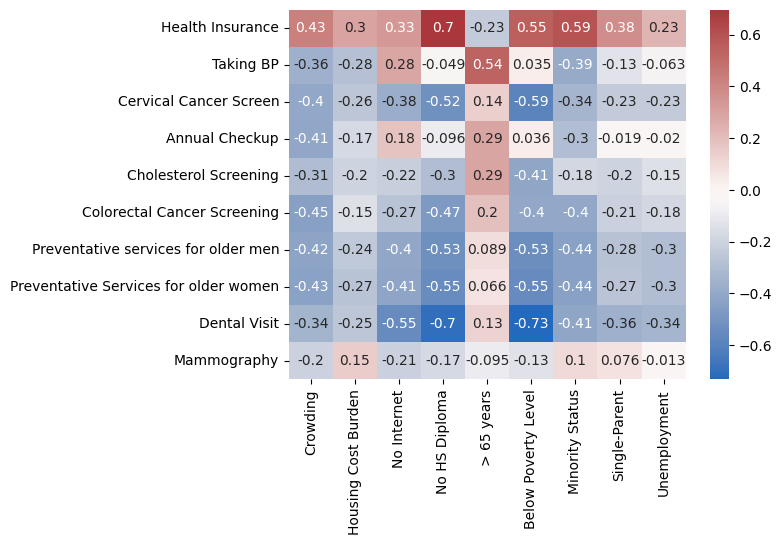

In [11]:
# plot heatmap of correlations between sdoh and preventative measures
sns.heatmap(df_corr, annot=True, xticklabels=sdoh_abbrev, yticklabels=prevention_abbrev, cmap='vlag')

- Lack of health insurance has a positive correlation with most sdoh measures
- Cervical Cancer screening, cholesterol screening, colonoscopy screening, preventative for older men/women, dental, and mammory have negative correlations with sdoh measures
- BP medication and annual checkup do not have as strong of correlations
- Education and poverty sdoh measures seem to have the strongest correlations

### Poplulation

Distribution of populations by zip code

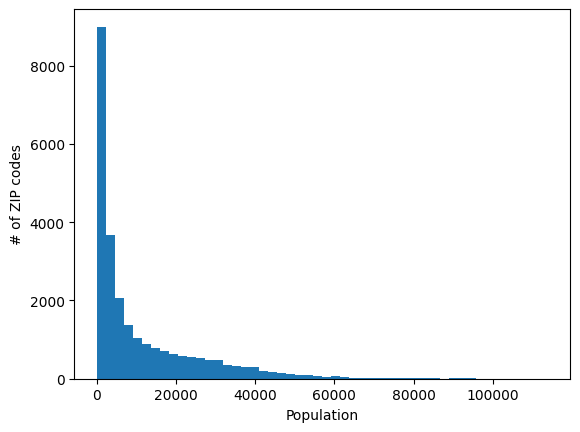

In [12]:
plt.hist(df_combined_zip['TotalPopulation_x'],bins=50)
plt.xlabel('Population')
plt.ylabel('# of ZIP codes')
plt.show()

- population totals are skewed to lower zip populations

Slice Data into low and high poplulations 

In [13]:
low_pop = df_combined_zip[df_combined_zip['TotalPopulation_x']<=5000]
high_pop = df_combined_zip[df_combined_zip['TotalPopulation_x']>20000]
low_pop.head()


,ZIP,Estimate Households Total,Percent Households lt 10k,Estimate Households Median income (dollars),Estimate Families Total,Estimate Families Median income (dollars),Estimate Nonfamily households Total,Estimate Nonfamily households Median income (dollars),Percent Households that are Families,TotalPopulation_x,All Teeth Lost,Annual Checkup,Any Disability,Arthritis,Binge Drinking,COPD,Cancer (except skin),Cervical Cancer Screening,Cholesterol Screening,Chronic Kidney Disease,Cognitive Disability,Colorectal Cancer Screening,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Depression,Diabetes,General Health,Health Insurance,Hearing Disability,High Blood Pressure,High Cholesterol,Independent Living Disability,Mammography,Mental Health,Mobility Disability,Obesity,Physical Health,Physical Inactivity,Self-care Disability,Sleep <7 hours,Stroke,Taking BP Medication,Vision Disability,TotalPopulation_y,Crowding among housing units,Housing cost burden among households,No broadband internet subscription among households,No high school diploma among adults aged 25 years or older,Persons aged 65 years or older,Persons living below 150% of the poverty level,Persons of racial or ethnic minority status,Single-parent households,Unemployment among people 16 years and older in the labor force,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Percent!!RACE!!Total population,Percent!!RACE!!Total population!!One race,Percent!!RACE!!Total population!!One race!!Black or African American,Percent Margin of Error!!RACE!!Total population!!One race!!Black or African American,Percent!!RACE!!Total population!!One race!!American Indian and Alaska Native,Percent Margin of Error!!RACE!!Total population!!One race!!American Indian and Alaska Native,Percent!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander,Percent Margin of Error!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race),Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race),Estimate!!Total housing units,State Name,State,Political Affiliation (2008-2020 presidential elections),spend_2017,spend_2018,spend_2019,spend_2020,longitude,latitude
137,01008,531.0,0.0,93405.0,341.0,112083.0,190.0,68750.0,0.642185,1263.0,12.2,73.1,28.8,32.3,17.1,7.0,7.7,85.9,89.2,2.8,13.1,76.4,55.2,49.6,6.0,11.5,14.9,75.2,25.5,9.6,13.4,3.7,6.7,32.3,35.8,6.8,82.9,16.7,12.7,33.3,11.1,22.0,3.3,34.5,2.8,76.8,3.7,1171.0,1.6,18.6,22.5,9.2,26.1,8.2,6.0,0.0,1.3,1116.0,96.5,1116.0,98.3,0.0,3.5,0.3,0.5,0.0,3.5,4.8,4.2,583.0,Massachusetts,MA,Deep Blue,53.37269,76.31,83.44,86.76,-72.952030,42.184296
139,01010,1480.0,3.1,88438.0,1056.0,129375.0,424.0,40357.0,0.713514,3609.0,11.9,73.3,28.6,32.2,16.9,6.9,7.8,86.9,89.4,2.8,13.0,76.2,55.9,48.4,5.8,11.5,14.7,75.3,25.5,9.6,13.2,3.7,6.6,32.1,35.3,6.9,82.7,16.7,12.7,33.7,11.0,21.8,3.3,34.4,2.8,76.6,3.8,3703.0,0.8,24.9,10.0,2.9,20.0,13.0,18.6,1.9,5.7,3663.0,106.7,3663.0,90.4,5.5,6.2,0.0,1.1,0.0,1.1,2.1,1.5,1670.0,Massachusetts,MA,Deep Blue,53.37269,76.31,83.44,86.76,-72.206196,42.128591
140,01011,512.0,2.9,80640.0,335.0,81960.0,177.0,63542.0,0.654297,1370.0,12.5,72.7,28.2,31.3,17.4,6.9,7.7,86.1,88.8,2.8,13.0,76.4,57.0,47.9,5.8,11.3,14.8,74.7,24.9,9.2,13.1,3.8,6.6,31.2,35.3,6.7,81.4,16.4,12.4,32.3,10.9,21.7,3.2,33.9,2.8,76.3,3.7,1332.0,1.4,28.3,25.3,10.2,17.9,14.9,2.6,4.8,1.8,1486.0,92.2,1486.0,97.4,0.3,0.4,0.0,2.7,0.0,2.7,2.8,2.5,696.0,Massachusetts,MA,Deep Blue,53.37269,76.31,83.44,86.76,-72.959437,42.291968
141,01012,198.0,5.1,73906.0,132.0,76667.0,66.0,28000.0,0.666667,661.0,11.5,72.7,25.1,28.8,17.1,6.7,7.8,84.3,89.0,2.8,11.9,78.2,55.6,41.9,5.7,10.8,14.1,73.1,23.2,8.4,12.7,3.7,6.6,28.2,36.1,6.4,78.7,15.2,11.8,26.8,10.5,20.3,3.1,30.7,2.8,76.2,3.6,503.0,

Create correlation matrices for the high and low population datasets

In [14]:
df_corr_low = low_pop[cols_to_corr].corr()
df_corr_low = df_corr_low.loc[prevention_measures][sdoh_measures]

df_corr_high = high_pop[cols_to_corr].corr()
df_corr_high = df_corr_high.loc[prevention_measures][sdoh_measures]

Text(0.5, 1.0, 'Low Population (<5k)')

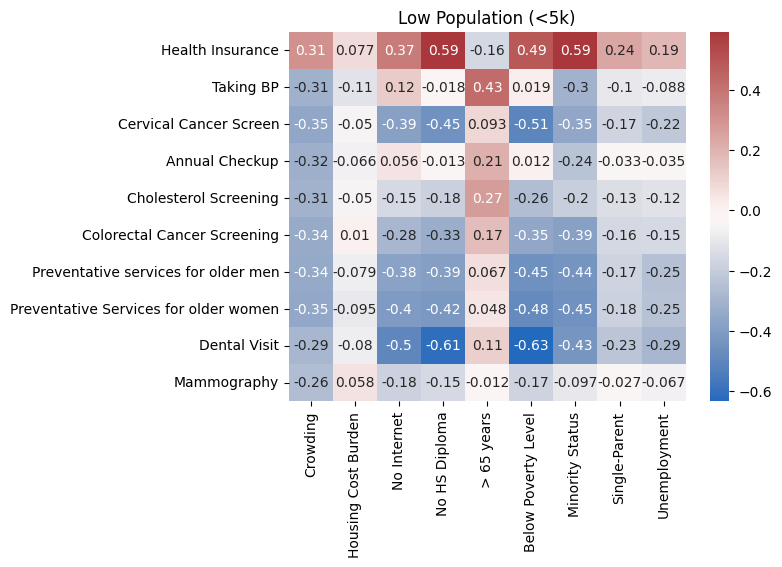

In [15]:
# Heatmap of the low population correlations
sns.heatmap(df_corr_low, annot=True, xticklabels=sdoh_abbrev, yticklabels=prevention_abbrev, cmap='vlag')
plt.title('Low Population (<5k)')

Text(0.5, 1.0, 'High Population (>20k)')

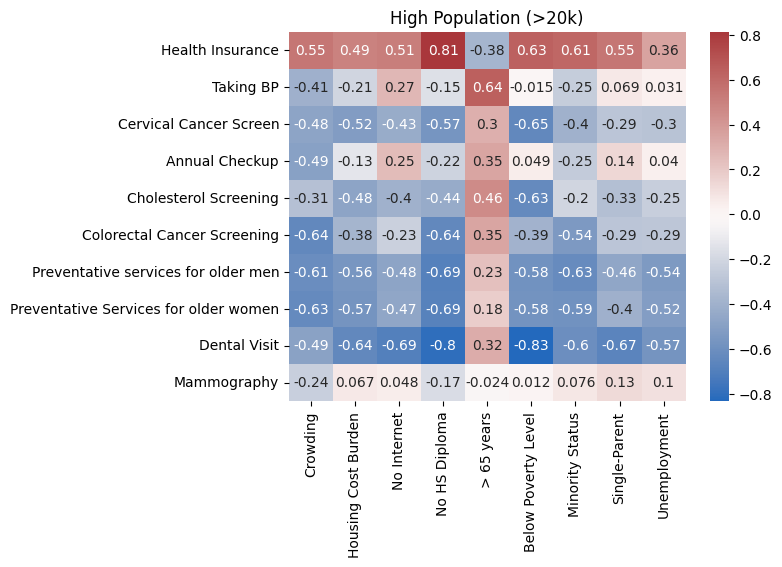

In [16]:
# Heatmap of the high population correlations
sns.heatmap(df_corr_high, annot=True, xticklabels=sdoh_abbrev, yticklabels=prevention_abbrev, cmap='vlag')
plt.title('High Population (>20k)')

- Overall we see a stronger correlation in the higher population zip codes

In [77]:
# specify the sdoh measures of interest for making scatter plots
sdoh_of_interest = ['No high school diploma among adults aged 25 years or older', 'Persons living below 150% of the poverty level',
                    'Persons of racial or ethnic minority status']

#### Health Insurance Access

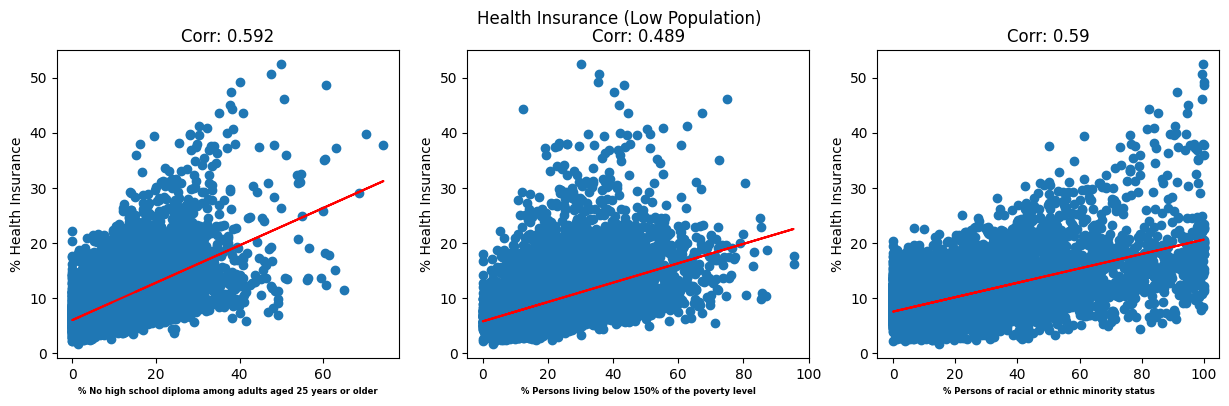

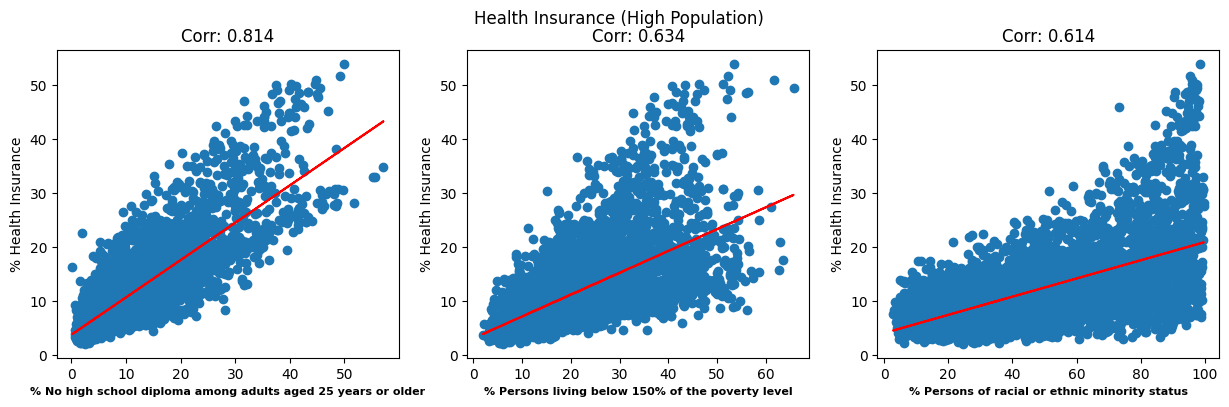

In [79]:
health_measure = 'Health Insurance'

# Low pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(low_pop[sdoh_measure],low_pop[health_measure])
    m, b = np.polyfit(low_pop[sdoh_measure], low_pop[health_measure], 1)
    plt.plot(low_pop[sdoh_measure], m*low_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure, fontsize=6, fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(low_pop[health_measure].corr(low_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (Low Population)')
plt.show()

# High pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(high_pop[sdoh_measure],high_pop[health_measure])
    m, b = np.polyfit(high_pop[sdoh_measure], high_pop[health_measure], 1)
    plt.plot(high_pop[sdoh_measure], m*high_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=8,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(high_pop[health_measure].corr(high_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (High Population)')
plt.show()

#### Cervical Cancer Screening

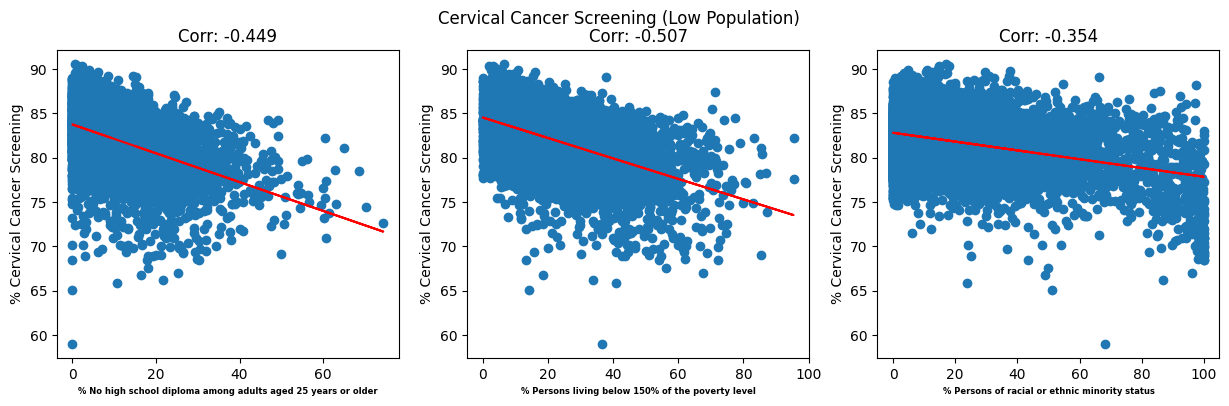

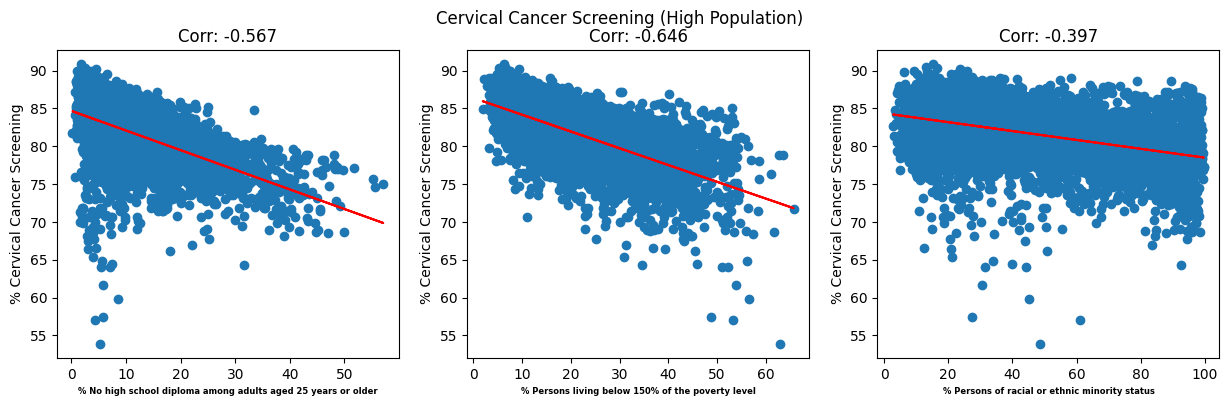

In [80]:
health_measure = 'Cervical Cancer Screening'

# Low pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(low_pop[sdoh_measure],low_pop[health_measure])
    m, b = np.polyfit(low_pop[sdoh_measure], low_pop[health_measure], 1)
    plt.plot(low_pop[sdoh_measure], m*low_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(low_pop[health_measure].corr(low_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (Low Population)')
plt.show()

# High pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(high_pop[sdoh_measure],high_pop[health_measure])
    m, b = np.polyfit(high_pop[sdoh_measure], high_pop[health_measure], 1)
    plt.plot(high_pop[sdoh_measure], m*high_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(high_pop[health_measure].corr(high_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (High Population)')
plt.show()

#### Annual Checkup

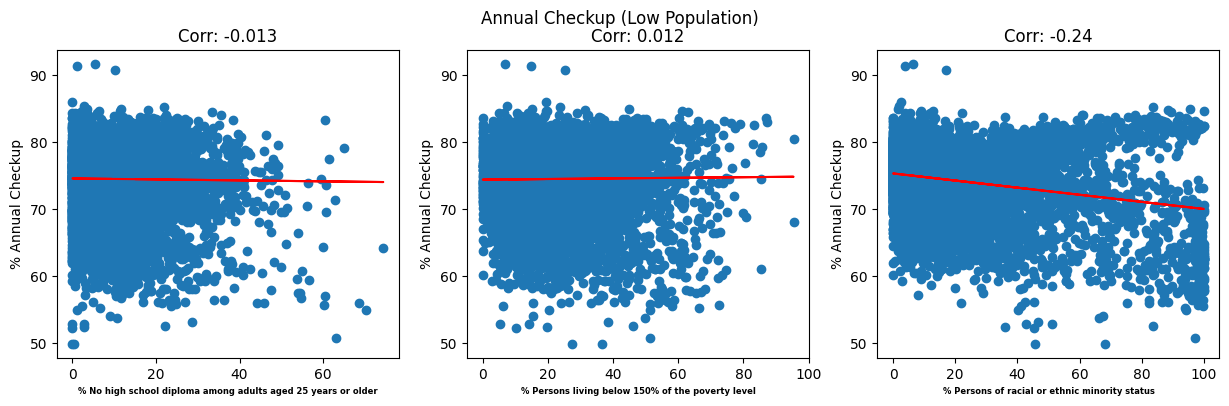

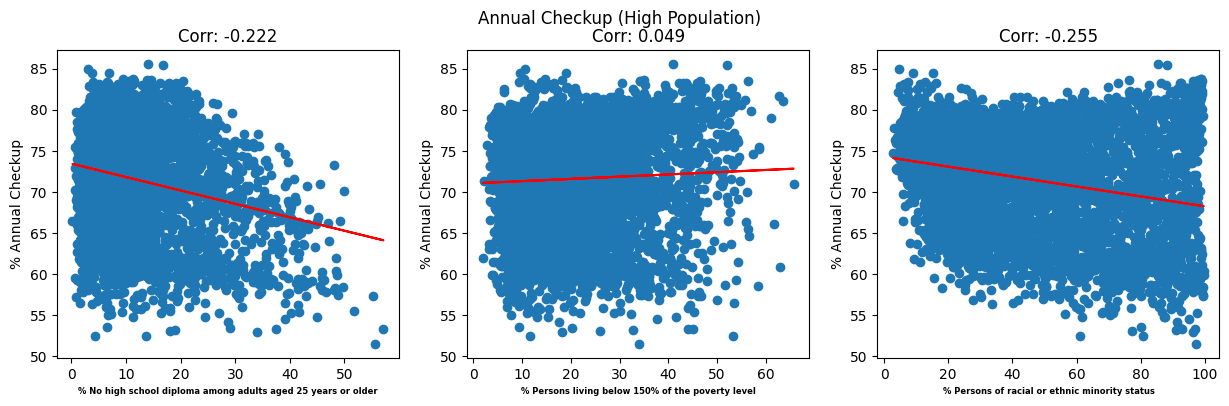

In [81]:
health_measure = 'Annual Checkup'

# Low pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(low_pop[sdoh_measure],low_pop[health_measure])
    m, b = np.polyfit(low_pop[sdoh_measure], low_pop[health_measure], 1)
    plt.plot(low_pop[sdoh_measure], m*low_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(low_pop[health_measure].corr(low_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (Low Population)')
plt.show()

# High pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(high_pop[sdoh_measure],high_pop[health_measure])
    m, b = np.polyfit(high_pop[sdoh_measure], high_pop[health_measure], 1)
    plt.plot(high_pop[sdoh_measure], m*high_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(high_pop[health_measure].corr(high_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (High Population)')
plt.show()

#### Cholesterol Screening

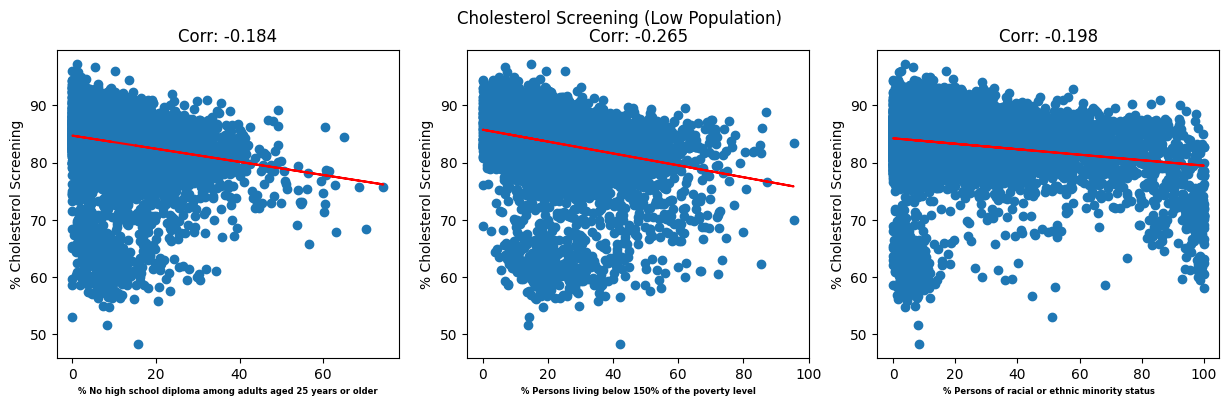

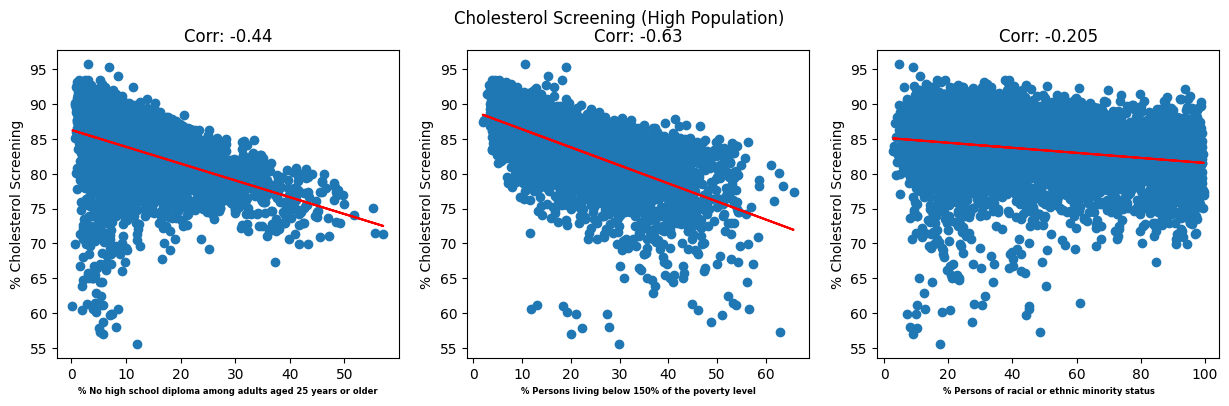

In [82]:
health_measure = 'Cholesterol Screening'

# Low pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(low_pop[sdoh_measure],low_pop[health_measure])
    m, b = np.polyfit(low_pop[sdoh_measure], low_pop[health_measure], 1)
    plt.plot(low_pop[sdoh_measure], m*low_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(low_pop[health_measure].corr(low_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (Low Population)')
plt.show()

# High pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(high_pop[sdoh_measure],high_pop[health_measure])
    m, b = np.polyfit(high_pop[sdoh_measure], high_pop[health_measure], 1)
    plt.plot(high_pop[sdoh_measure], m*high_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(high_pop[health_measure].corr(high_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (High Population)')
plt.show()

#### Colonoscopy Screening

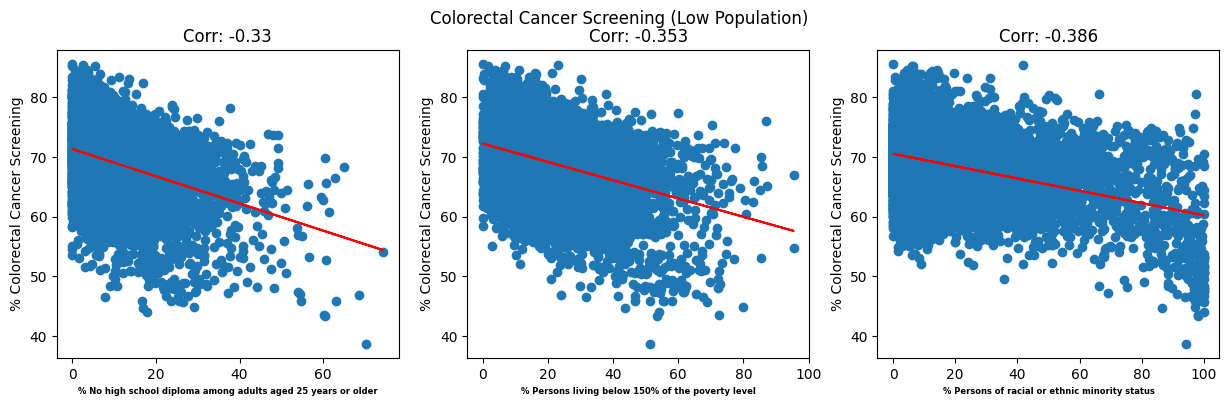

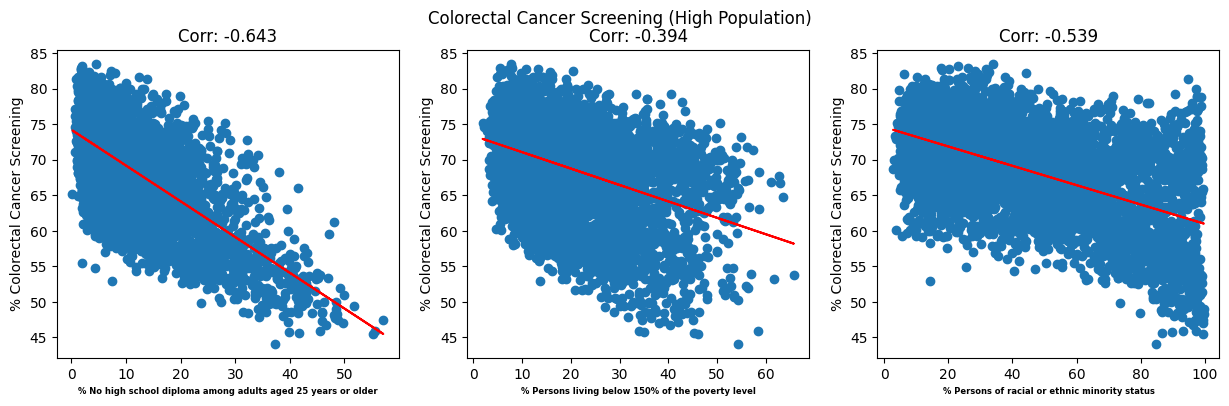

In [83]:
health_measure = 'Colorectal Cancer Screening'

# Low pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(low_pop[sdoh_measure],low_pop[health_measure])
    m, b = np.polyfit(low_pop[sdoh_measure], low_pop[health_measure], 1)
    plt.plot(low_pop[sdoh_measure], m*low_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(low_pop[health_measure].corr(low_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (Low Population)')
plt.show()

# High pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(high_pop[sdoh_measure],high_pop[health_measure])
    m, b = np.polyfit(high_pop[sdoh_measure], high_pop[health_measure], 1)
    plt.plot(high_pop[sdoh_measure], m*high_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(high_pop[health_measure].corr(high_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (High Population)')
plt.show()

#### Preventative care for older men

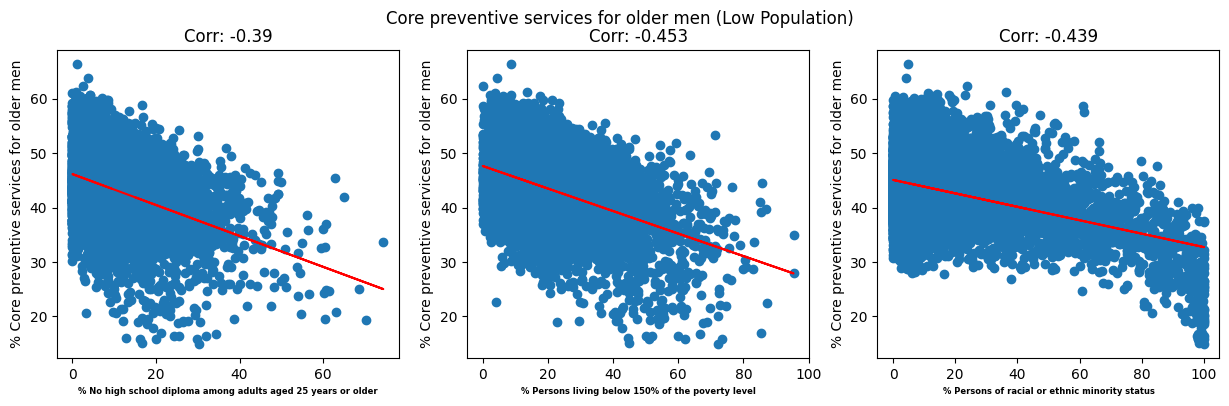

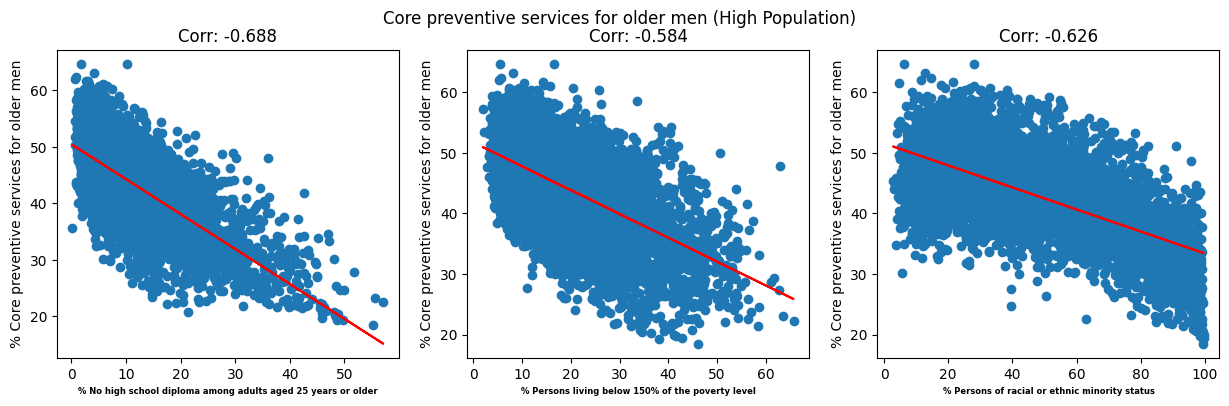

In [84]:
health_measure = 'Core preventive services for older men'

# Low pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(low_pop[sdoh_measure],low_pop[health_measure])
    m, b = np.polyfit(low_pop[sdoh_measure], low_pop[health_measure], 1)
    plt.plot(low_pop[sdoh_measure], m*low_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(low_pop[health_measure].corr(low_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (Low Population)')
plt.show()

# High pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(high_pop[sdoh_measure],high_pop[health_measure])
    m, b = np.polyfit(high_pop[sdoh_measure], high_pop[health_measure], 1)
    plt.plot(high_pop[sdoh_measure], m*high_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(high_pop[health_measure].corr(high_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (High Population)')
plt.show()

#### Preventative care for older women

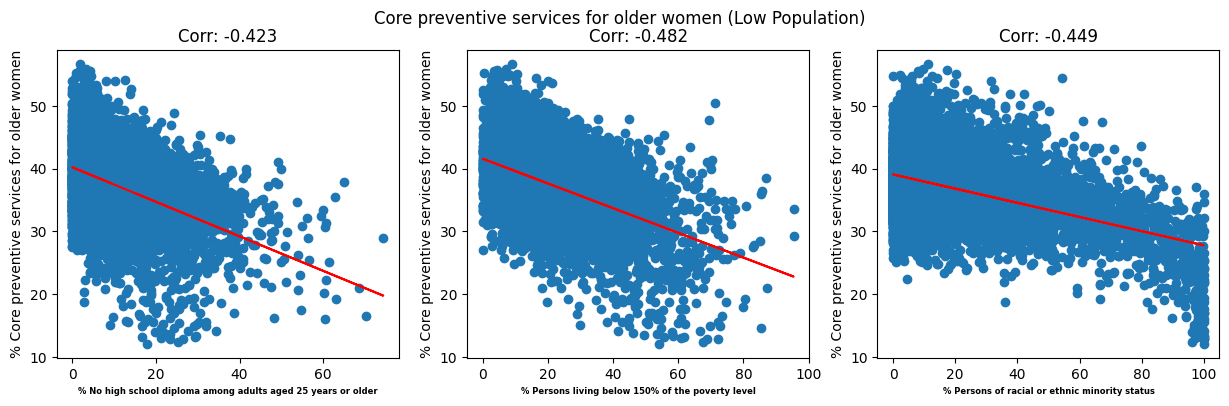

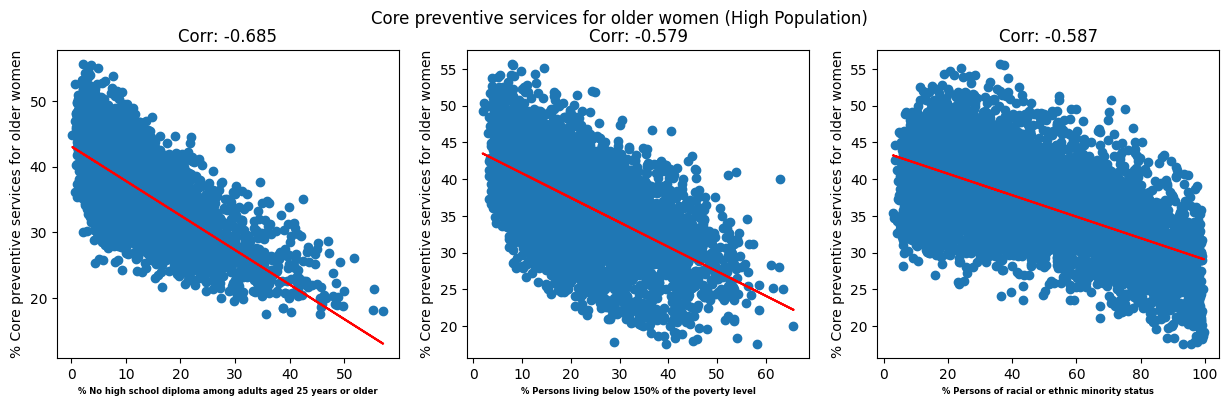

In [85]:
health_measure = 'Core preventive services for older women'

# Low pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(low_pop[sdoh_measure],low_pop[health_measure])
    m, b = np.polyfit(low_pop[sdoh_measure], low_pop[health_measure], 1)
    plt.plot(low_pop[sdoh_measure], m*low_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(low_pop[health_measure].corr(low_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (Low Population)')
plt.show()

# High pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(high_pop[sdoh_measure],high_pop[health_measure])
    m, b = np.polyfit(high_pop[sdoh_measure], high_pop[health_measure], 1)
    plt.plot(high_pop[sdoh_measure], m*high_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(high_pop[health_measure].corr(high_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (High Population)')
plt.show()

#### Dental Visit

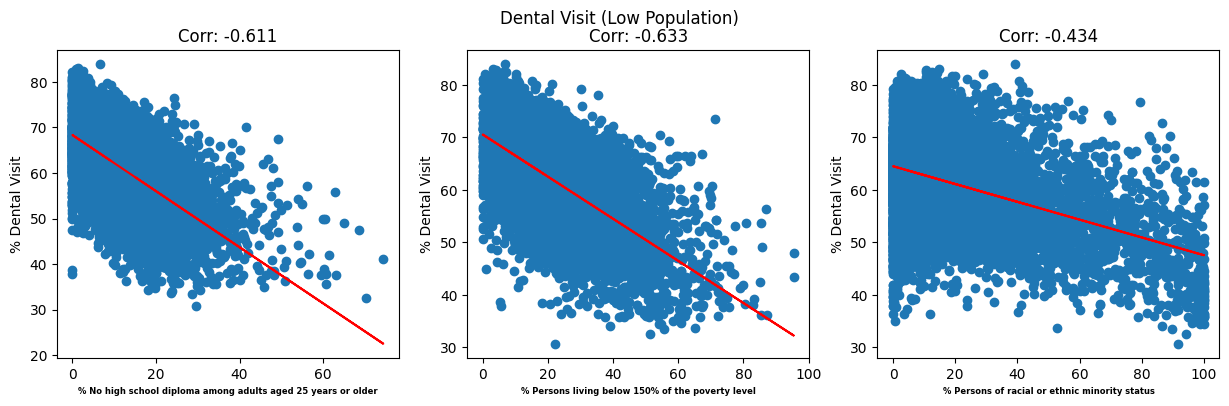

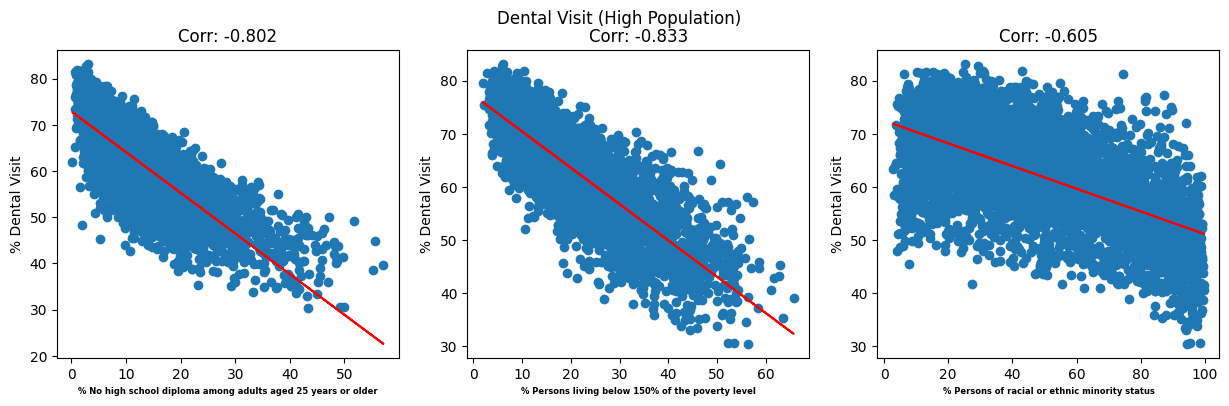

In [86]:
health_measure = 'Dental Visit'

# Low pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(low_pop[sdoh_measure],low_pop[health_measure])
    m, b = np.polyfit(low_pop[sdoh_measure], low_pop[health_measure], 1)
    plt.plot(low_pop[sdoh_measure], m*low_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(low_pop[health_measure].corr(low_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (Low Population)')
plt.show()

# High pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(high_pop[sdoh_measure],high_pop[health_measure])
    m, b = np.polyfit(high_pop[sdoh_measure], high_pop[health_measure], 1)
    plt.plot(high_pop[sdoh_measure], m*high_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(high_pop[health_measure].corr(high_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (High Population)')
plt.show()

#### Mammography

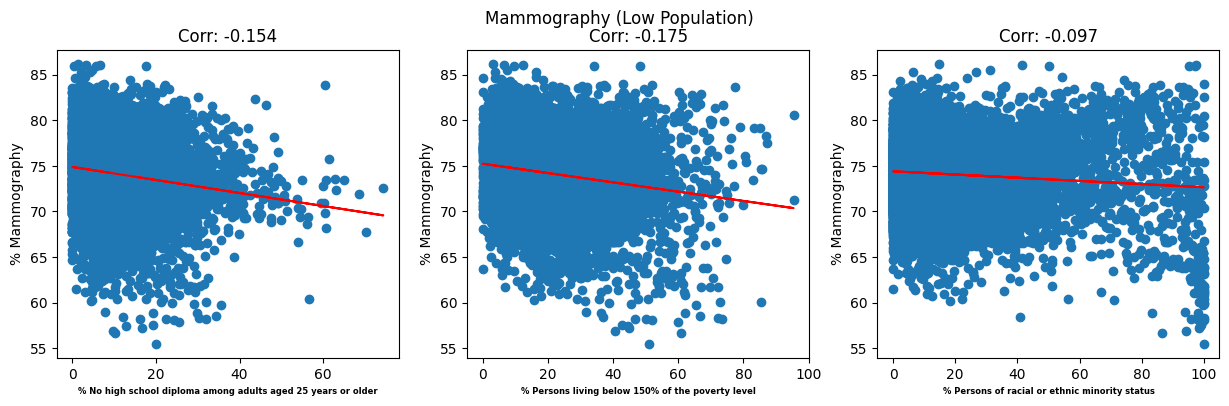

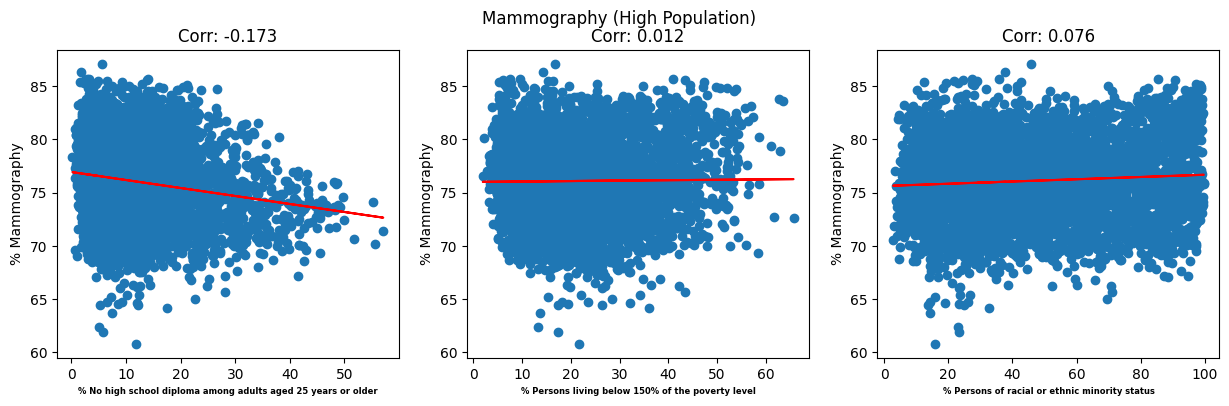

In [87]:
health_measure = 'Mammography'

# Low pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(low_pop[sdoh_measure],low_pop[health_measure])
    m, b = np.polyfit(low_pop[sdoh_measure], low_pop[health_measure], 1)
    plt.plot(low_pop[sdoh_measure], m*low_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(low_pop[health_measure].corr(low_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (Low Population)')
plt.show()

# High pop
plt.figure(figsize=(15,4))
for i, sdoh_measure in enumerate(sdoh_of_interest):
    plt.subplot(1,3,i+1)
    plt.scatter(high_pop[sdoh_measure],high_pop[health_measure])
    m, b = np.polyfit(high_pop[sdoh_measure], high_pop[health_measure], 1)
    plt.plot(high_pop[sdoh_measure], m*high_pop[sdoh_measure]+b,'r')
    plt.xlabel('% ' + sdoh_measure,fontsize=6,fontweight='bold')
    plt.ylabel('% ' + health_measure)
    plt.title('Corr: '+ str(round(high_pop[health_measure].corr(high_pop[sdoh_measure]),3)))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.suptitle(health_measure + ' (High Population)')
plt.show()

- We see stronger correlations in higher population zip codes

In [20]:
%watermark -u -i -d -m -v -iv -w

Last updated: 2024-02-13T13:21:05.942828-05:00

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.14.0

Compiler    : MSC v.1937 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 5, GenuineIntel
CPU cores   : 20
Architecture: 64bit

seaborn   : 0.12.2
pandas    : 2.0.3
re        : 2.2.1
numpy     : 1.25.2
matplotlib: 3.7.2

Watermark: 2.4.3

